In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor

In [55]:
def count_plot(length, width, xlabel, ylabel, title, given, col_name,hue=None, palette="dark", rotation=0, order=None, show_values=False):
    plt.figure(figsize=(length,width))
    ax = sns.countplot(data=given, x=col_name, hue=hue, palette=palette, order=order)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    if show_values:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height}", (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

def bar_plot(length, width, xlabel, ylabel, title, X, Y, Data, palette="dark", rotation=0, show_values=False):
    plt.figure(figsize=(length,width))
    ax = sns.barplot(x=X, y=Y, data=Data, palette=palette)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    if show_values:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height}", (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

def histplot(length, width, xlabel, ylabel, title, given, col_name, bins=10, kde=False, palette="dark", rotation=0):
    plt.figure(figsize=(length, width))
    ax = sns.histplot(data=given, x=col_name, bins=bins, kde=kde, color=palette)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


In [56]:
dataset = pd.read_csv("customer_feedback_satisfaction.csv")
dataset.set_index('CustomerID', inplace=True)

In [57]:
features = ['Age', 'Gender', 'Country', 'Income', 'ProductQuality',
            'ServiceQuality', 'PurchaseFrequency', 'FeedbackScore', 'LoyaltyLevel']
target = 'SatisfactionScore'

In [58]:
X = dataset[features]
y = dataset[target]

In [105]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'Country', 'LoyaltyLevel']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le  # for inverse_transform later if needed

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_35706/420280796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_35706/420280796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_35706/420280796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [74]:
# Map FeedbackScore to numeric values
feedback_map = {'Low': 1, 'Medium': 2, 'High': 3}
X['FeedbackScore'] = X['FeedbackScore'].map(feedback_map)

/var/folders/w0/_5c4mft945vchbzs2p863vvm0000gn/T/ipykernel_35706/3715628354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FeedbackScore'] = X['FeedbackScore'].map(feedback_map)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
automl = AutoML()
automl.fit(
    X_train=X_train,
    y_train=y_train,
    task="regression",
    time_budget=20,  # seconds
    estimator_list=['catboost']  # you can also try ['xgboost', 'rf'] if needed
)

[flaml.automl.logger: 06-26 18:17:10] {1752} INFO - task = regression
[flaml.automl.logger: 06-26 18:17:10] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-26 18:17:10] {1862} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 06-26 18:17:10] {1979} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl.logger: 06-26 18:17:10] {2282} INFO - iteration 0, current learner catboost
[flaml.automl.logger: 06-26 18:17:10] {2417} INFO - Estimated sufficient time budget=2752s. Estimated necessary time budget=3s.
[flaml.automl.logger: 06-26 18:17:10] {2466} INFO -  at 0.3s,	estimator catboost's best error=0.1973,	best estimator catboost's best error=0.1973
[flaml.automl.logger: 06-26 18:17:10] {2282} INFO - iteration 1, current learner catboost
[flaml.automl.logger: 06-26 18:17:11] {2466} INFO -  at 0.8s,	estimator catboost's best error=0.1968,	best estimator catboost's best error=0.1968
[flaml.automl.logger: 06-26 18:17:11] {2282} INFO - iteration 2, curr

In [77]:
y_pred = automl.predict(X_test)
print("FLAML Best ML model:", automl.best_estimator)
print("Best config:", automl.best_config)
print("Best loss:", automl.best_loss)
print("R² Score (FLAML):", r2_score(y_test, y_pred))
print("RMSE (FLAML):", mean_squared_error(y_test, y_pred, squared=False))


FLAML Best ML model: catboost
Best config: {'early_stopping_rounds': 10, 'learning_rate': 0.06233639237958607, 'n_estimators': 8192}
Best loss: 0.196773870974695
R² Score (FLAML): 0.7922443513913077
RMSE (FLAML): 7.629688421111795


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
# Now you can safely run CatBoost
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.06233,
    depth=6,
    verbose=100
)
cat_model.fit(X_train, y_train)

0:	learn: 16.2510058	total: 4.44ms	remaining: 4.44s
100:	learn: 7.6338362	total: 161ms	remaining: 1.44s
200:	learn: 7.5203268	total: 313ms	remaining: 1.24s
300:	learn: 7.4314236	total: 461ms	remaining: 1.07s
400:	learn: 7.3493691	total: 612ms	remaining: 914ms
500:	learn: 7.2803054	total: 770ms	remaining: 766ms
600:	learn: 7.2165157	total: 936ms	remaining: 621ms
700:	learn: 7.1567153	total: 1.09s	remaining: 467ms
800:	learn: 7.0992935	total: 1.25s	remaining: 311ms
900:	learn: 7.0460434	total: 1.42s	remaining: 156ms
999:	learn: 6.9956578	total: 1.65s	remaining: 0us


In [79]:
y_pred_cat = cat_model.predict(X_test)
print("R² Score (CatBoost):", r2_score(y_test, y_pred_cat))
print("RMSE (CatBoost):", mean_squared_error(y_test, y_pred_cat, squared=False))


R² Score (CatBoost): 0.788315367281269
RMSE (CatBoost): 7.701495184624587


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [80]:
importances = cat_model.get_feature_importance()
feature_names = X_train.columns

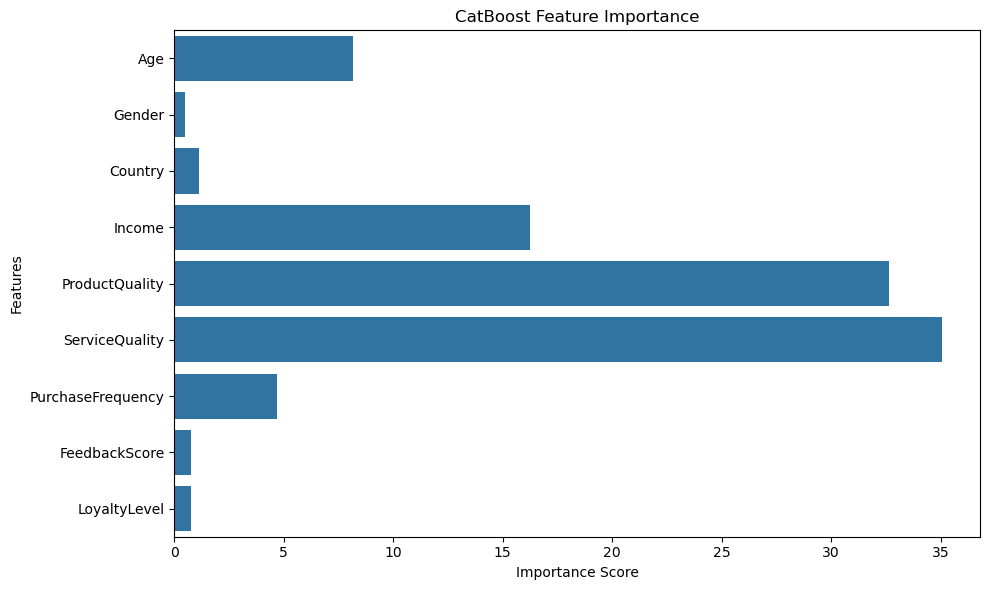

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [84]:
sample_values = [[28, 0, 2, 80000, 8, 9, 10, 5, 1]]
prediction = cat_model.predict(sample_values)
print("Predicted Satisfaction Score:", prediction[0])

Predicted Satisfaction Score: 99.64764416898119


In [85]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 5.438790858028709


In [86]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

MAPE: 7.529676952089373


In [87]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", evs)

Explained Variance Score: 0.7922459633498956


In [88]:
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

Median Absolute Error: 3.8337602952404524


In [104]:
threshold = 7.7
correct = np.abs(y_pred - y_test) <= threshold
accuracy = np.mean(correct) * 100

print(f"Custom Accuracy within ±{threshold}: {accuracy:.2f}%")

Custom Accuracy within ±7.7: 73.07%
